In [2]:
library(zoo)

In [3]:
library(forecast)

Loading required package: timeDate
This is forecast 7.1 



In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [4]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june-logreg/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [8]:
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june-logreg/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [13]:
june_over_perc = ts((june_over$series/june_over$total)[49:(672)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[49:(672)], frequency=24)

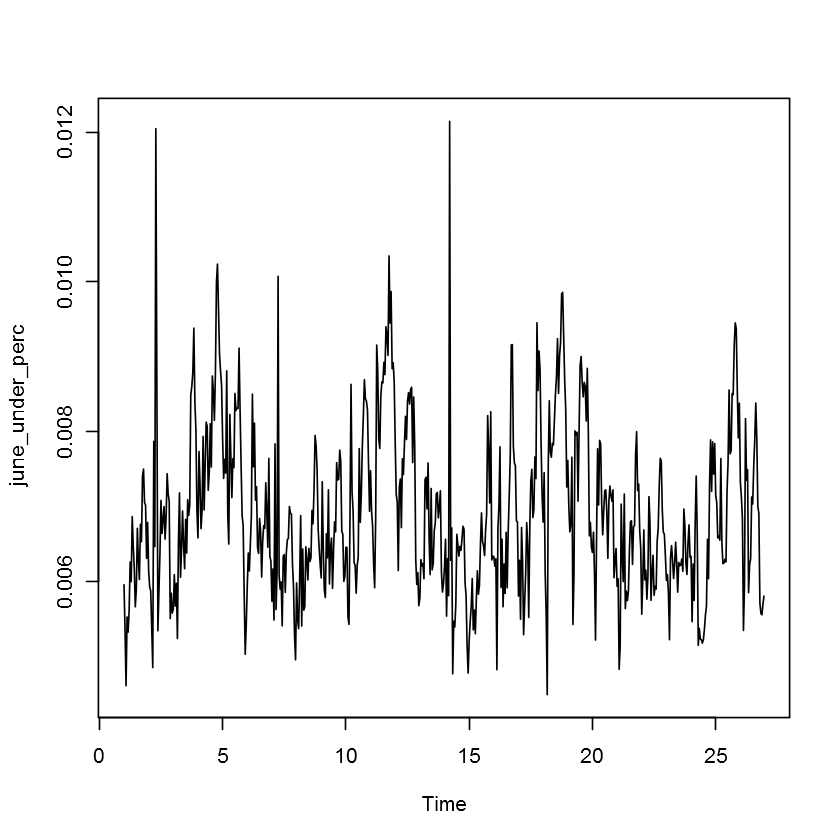

In [15]:
plot(june_under_perc)

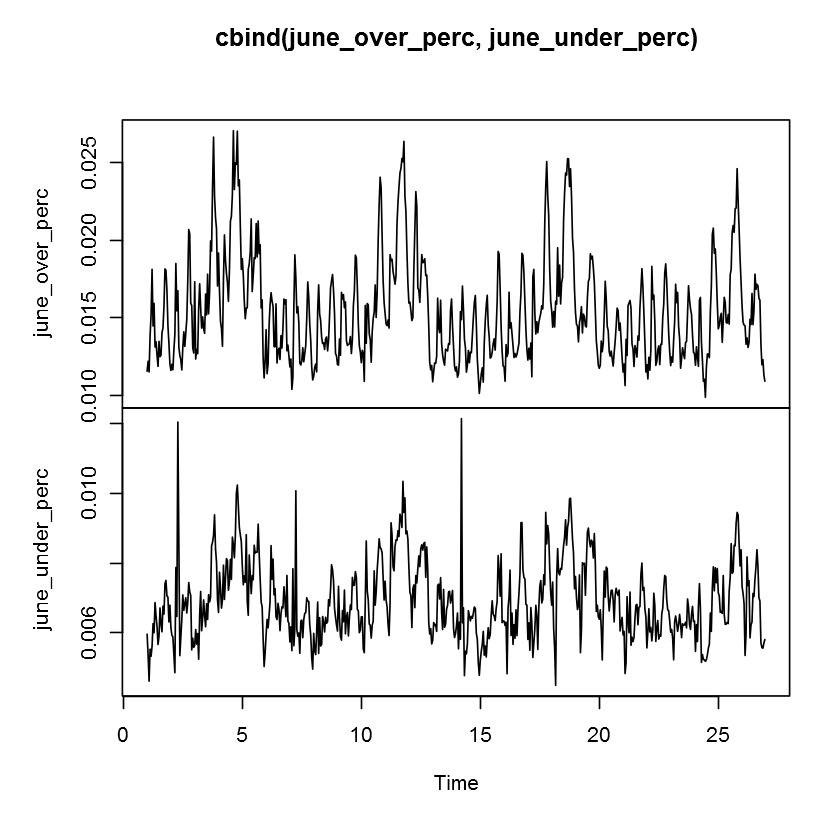

In [17]:
plot.ts(cbind(june_over_perc, june_under_perc))

In [24]:
june_cas = ts(preprocessing('E:/summary/june-logreg/june_casual.csv', 'E:/summary/june-logreg/june_total.csv')$series, frequency=24)
june_total = ts(preprocessing('E:/summary/june-logreg/june_casual.csv', 'E:/summary/june-logreg/june_total.csv')$total, frequency=24)

In [27]:
june_cas2 = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$series, frequency=24)
june_total2 = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$total, frequency=24)

In [6]:
cas = ts(preprocessing('E:/summary/sept-trained/sept_casual.csv', 'E:/summary/sept-trained/sept_total.csv')$series, frequency=24)
look = ts(preprocessing('E:/summary/sept-trained/sept_looking.csv', 'E:/summary/sept-trained/sept_total.csv')$series, frequency=24)
ref = ts(preprocessing('E:/summary/sept-trained/sept_reflecting.csv', 'E:/summary/sept-trained/sept_total.csv')$series, frequency=24)
total = ts(preprocessing('E:/summary/sept-trained/sept_casual.csv', 'E:/summary/sept-trained/sept_total.csv')$total, frequency=24)

In [7]:
alc = ts(preprocessing('E:/summary/sept-trained/sept_alc.csv', 'E:/summary/sept-trained/sept_total.csv')$series, frequency=24)
fpa = ts(preprocessing('E:/summary/sept-trained/sept_fpa.csv', 'E:/summary/sept-trained/sept_total.csv')$series, frequency=24)

In [8]:
library(repr)

In [9]:
options(repr.plot.width=10, repr.height=4)

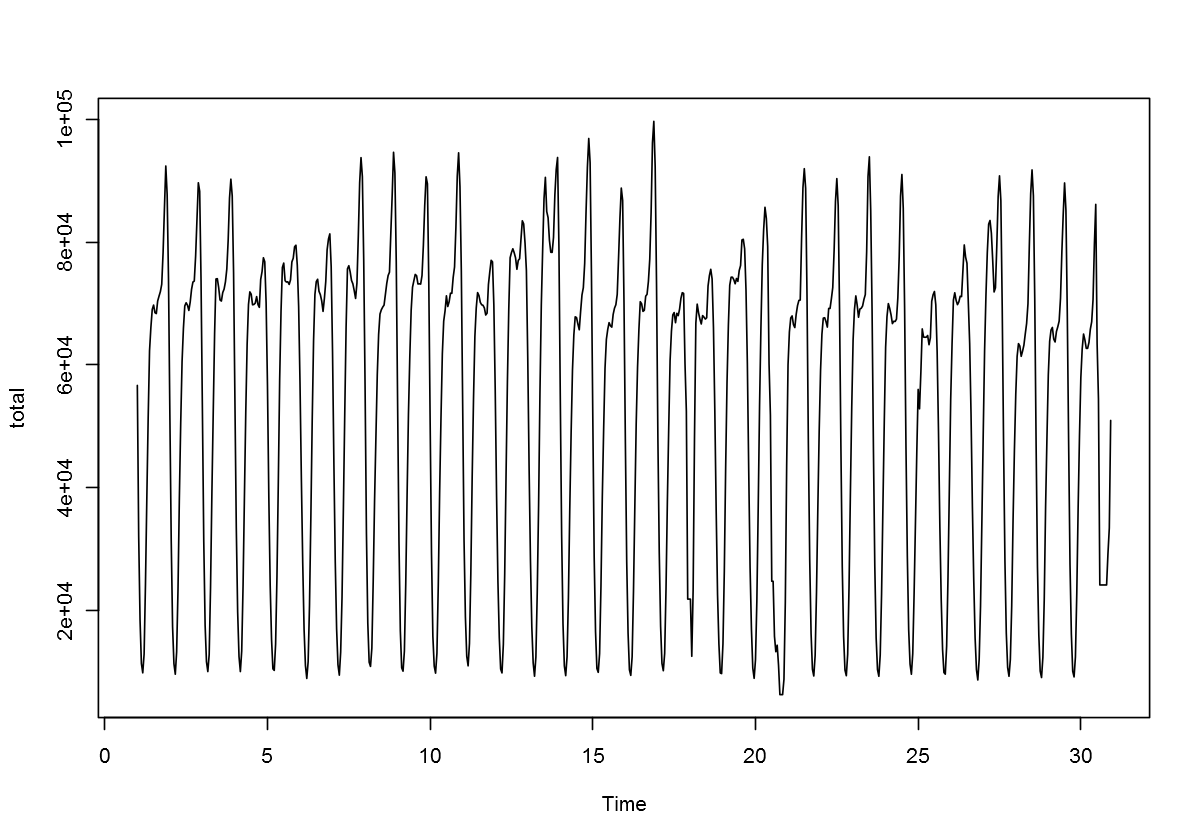

In [8]:
ts.plot(total)

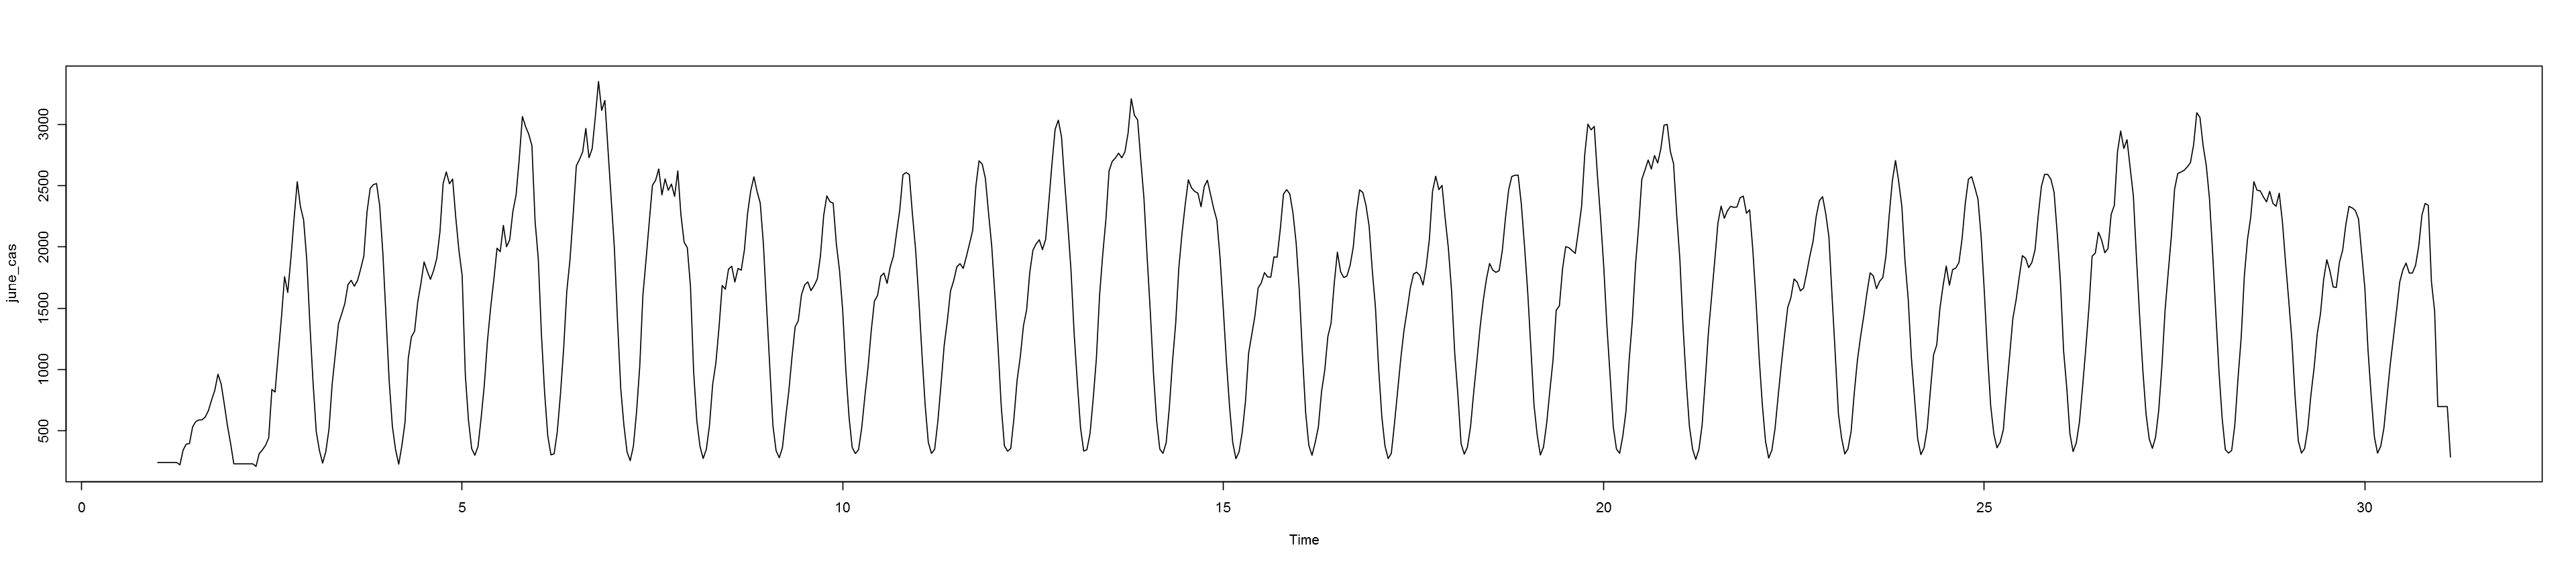

In [29]:
ts.plot(june_cas)

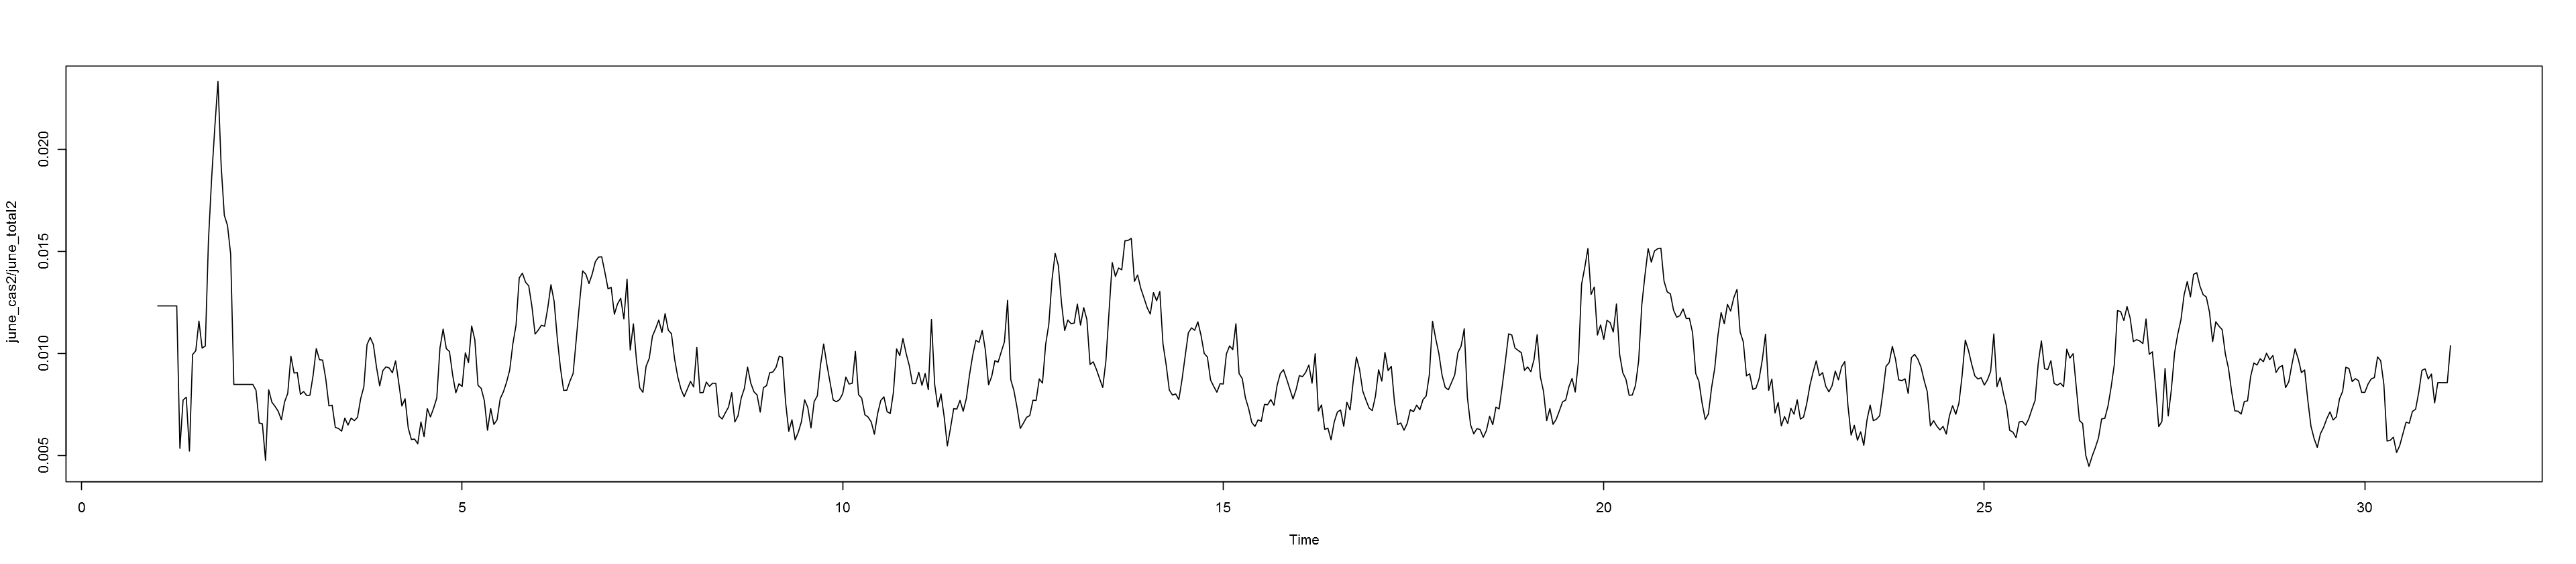

In [28]:
ts.plot(june_cas2/june_total2)

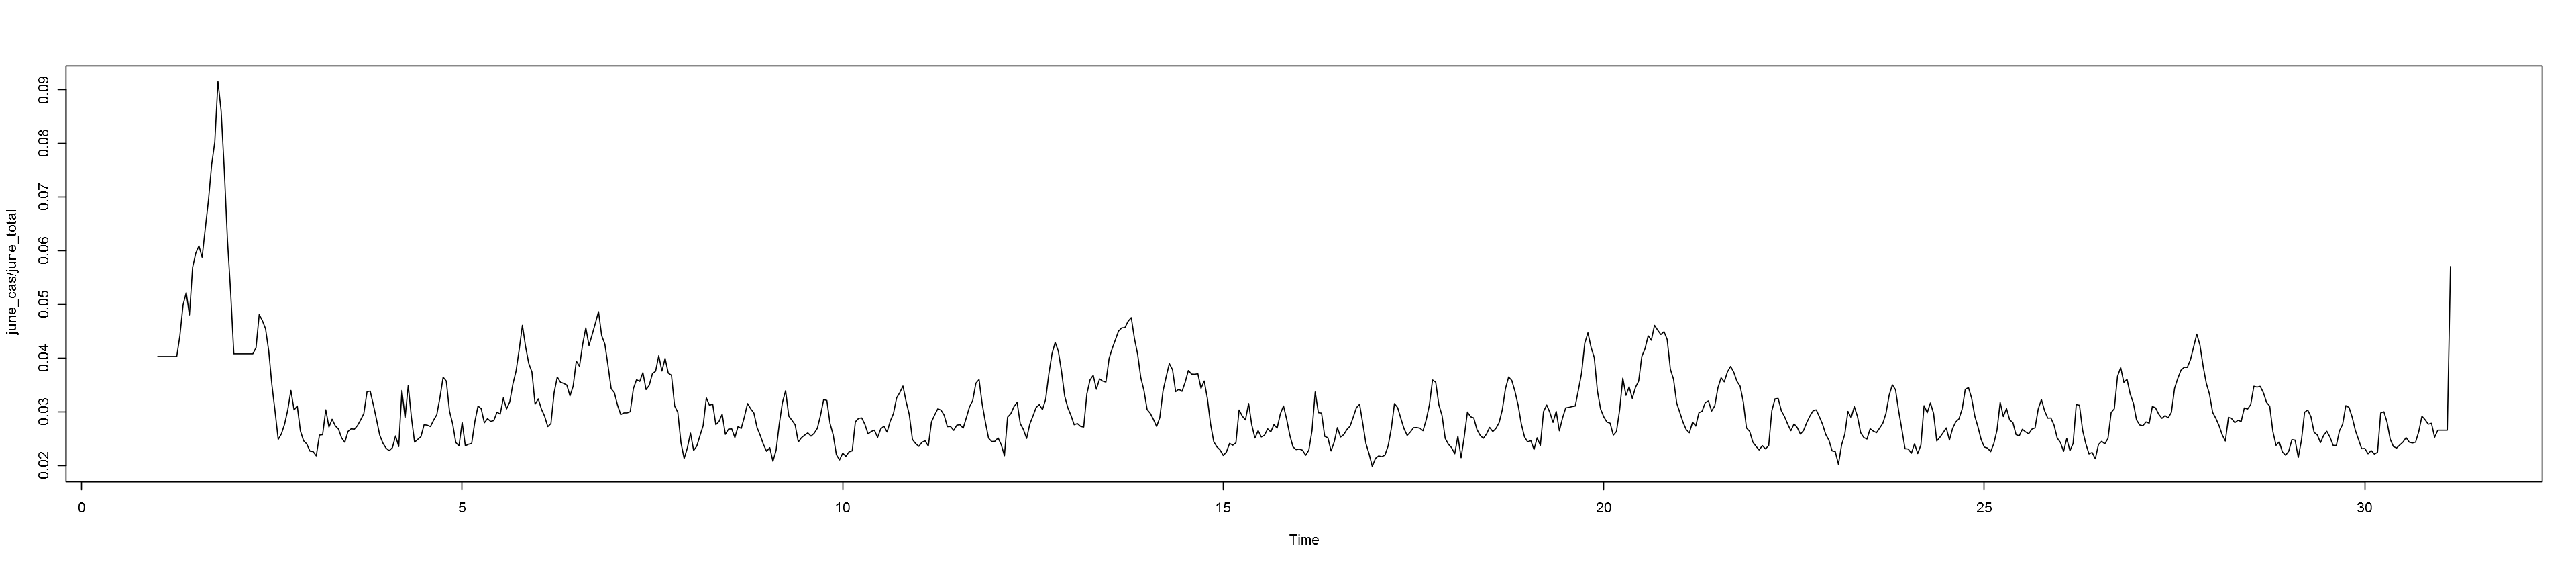

In [26]:
ts.plot(june_cas/june_total)

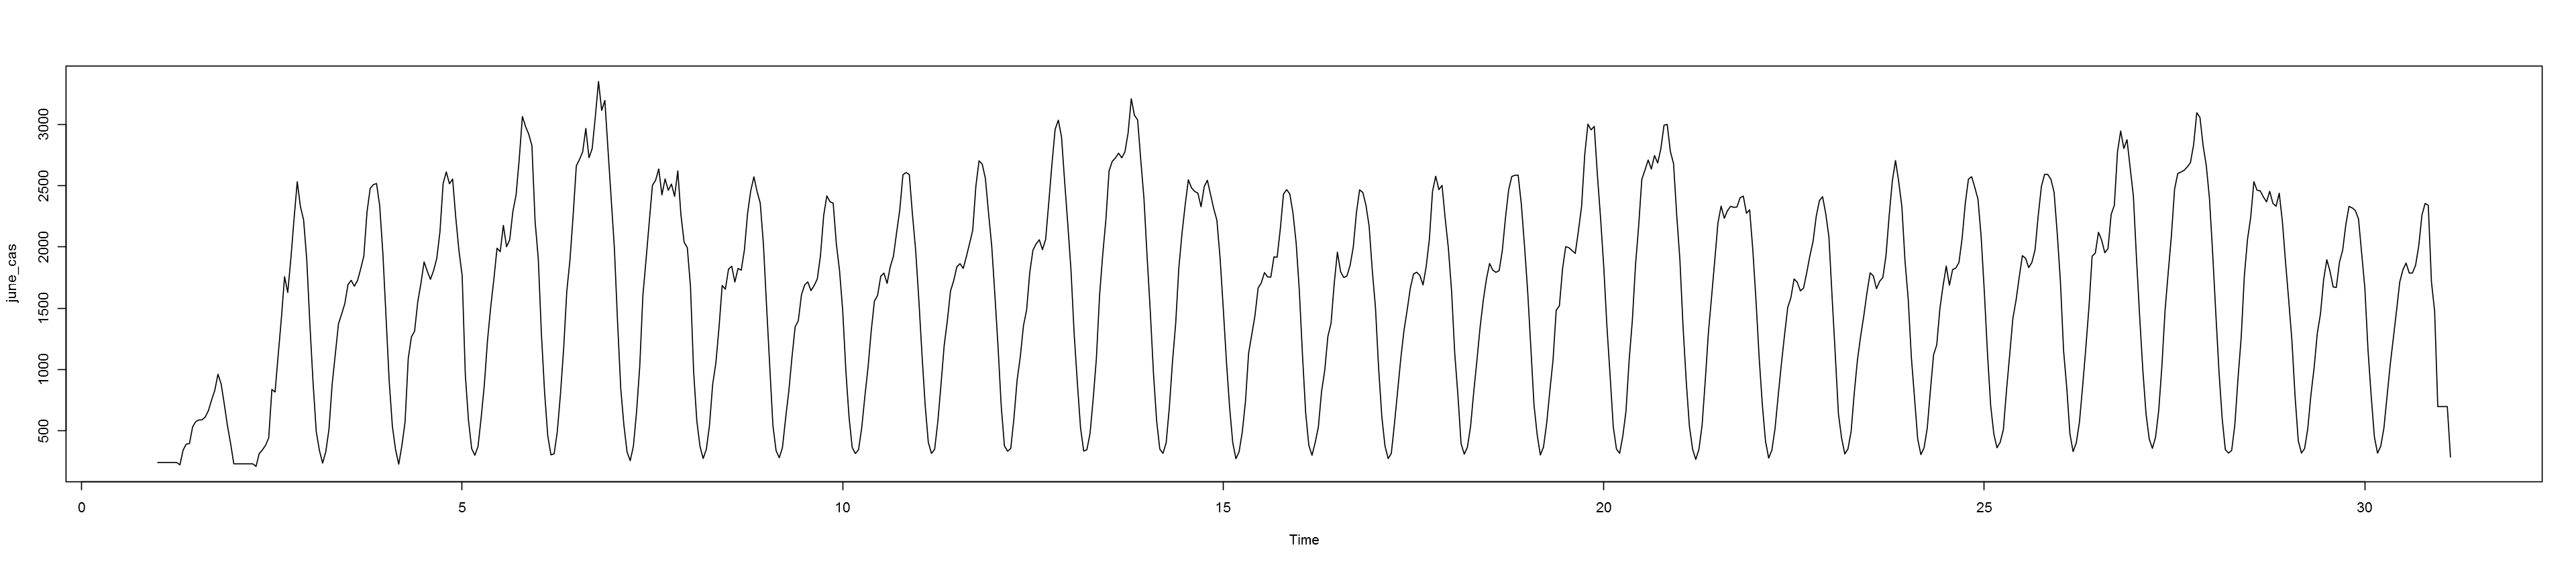

In [25]:
ts.plot(june_cas)

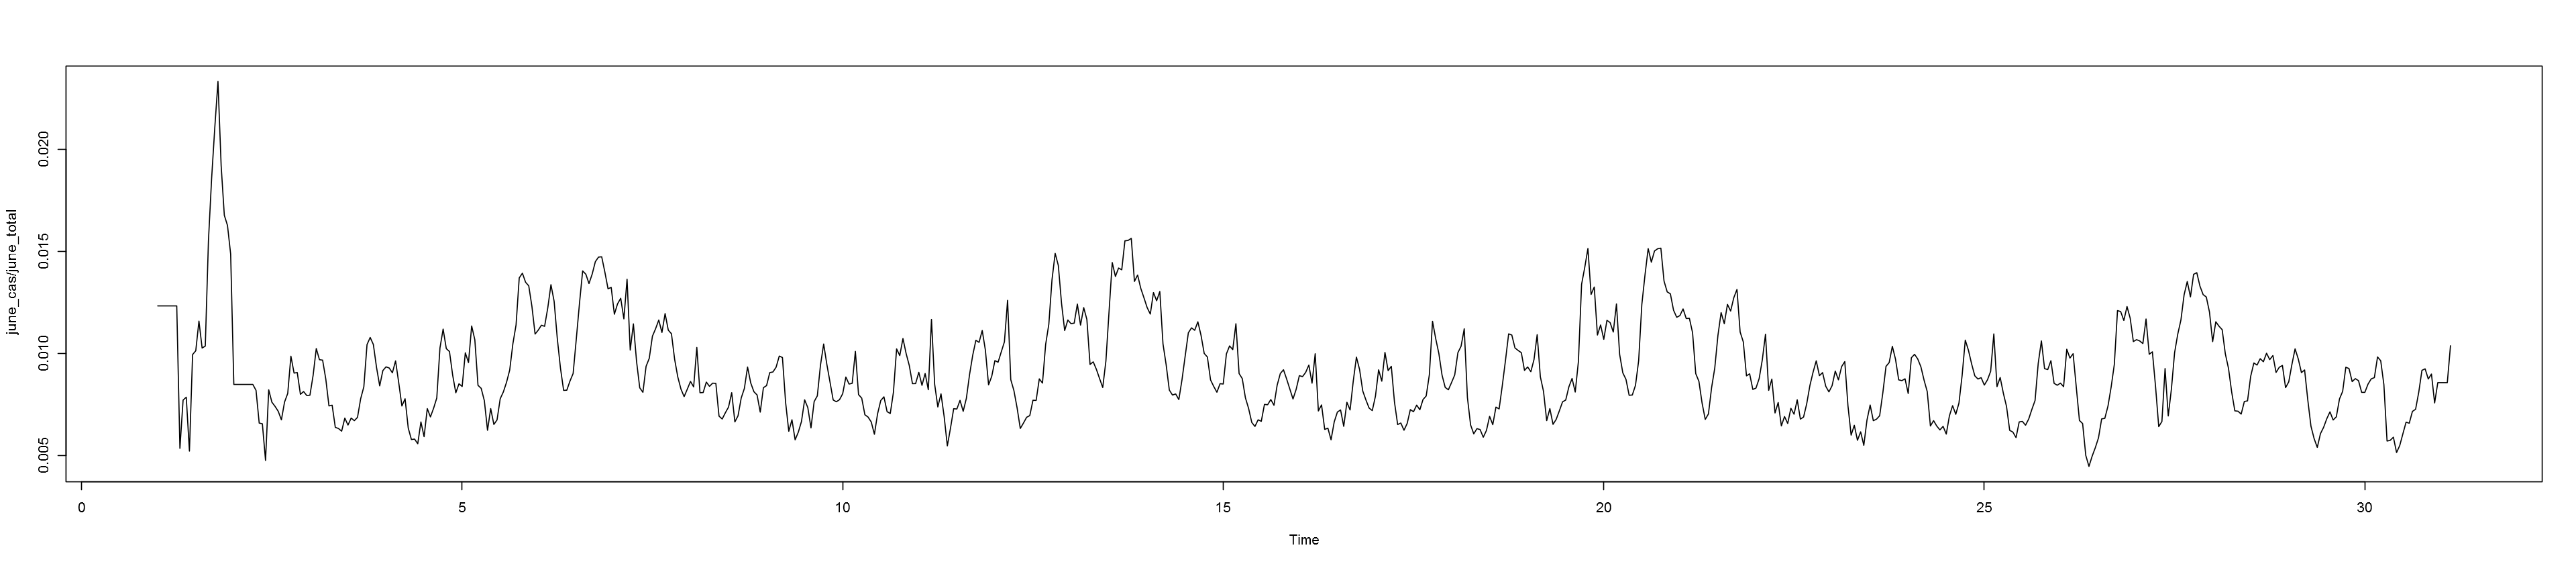

In [18]:
ts.plot(june_cas/june_total)

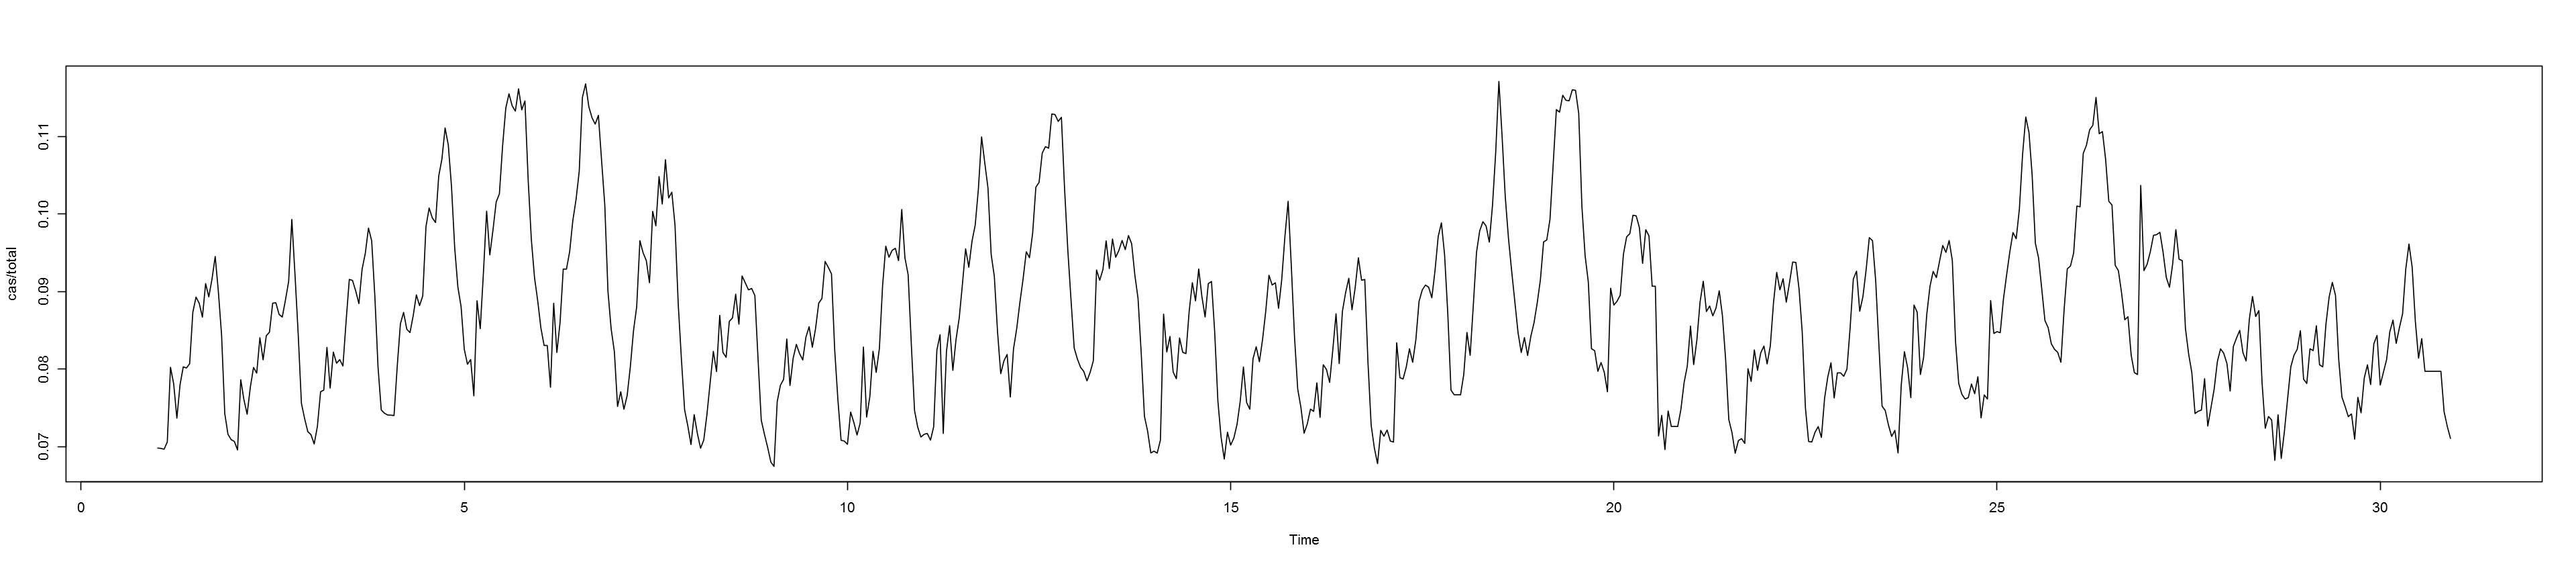

In [23]:
ts.plot(cas/total)

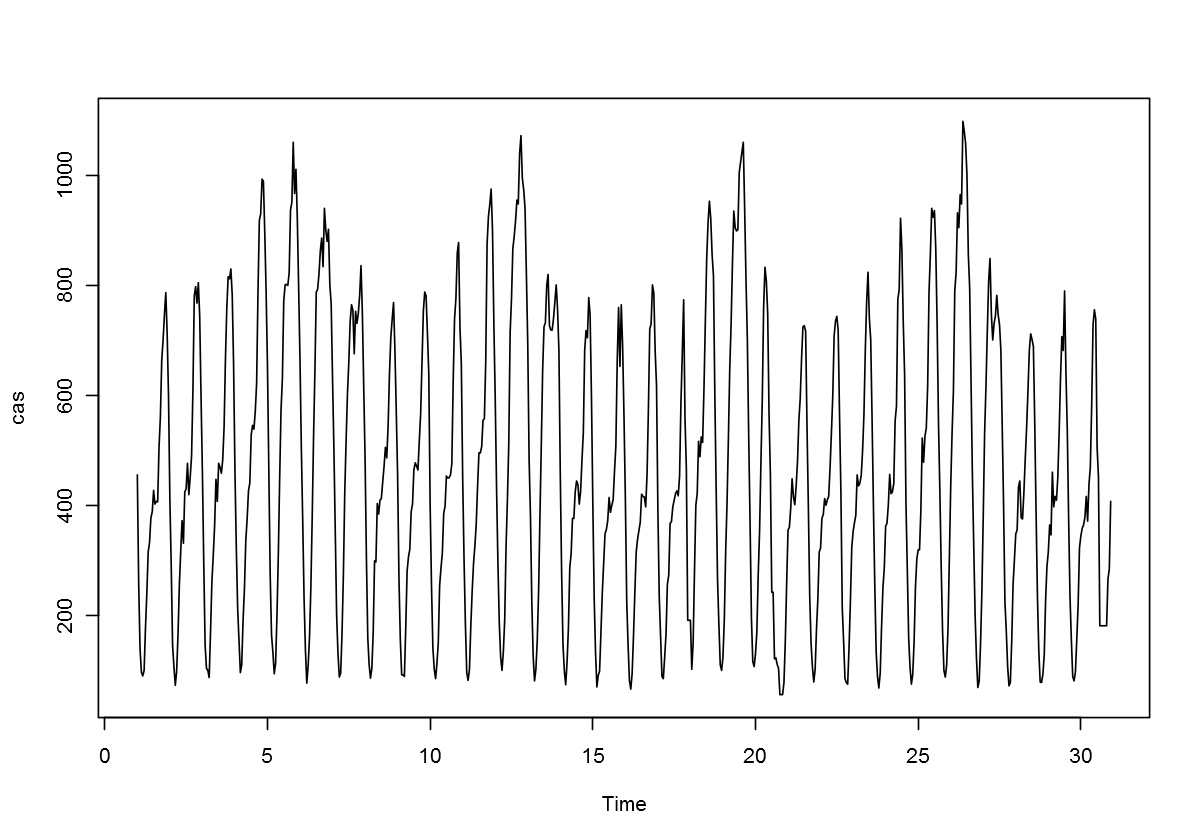

In [9]:
ts.plot(cas)

In [12]:
options(repr.plot.width=32, repr.height=4)

In [13]:
fp = cas + look + ref

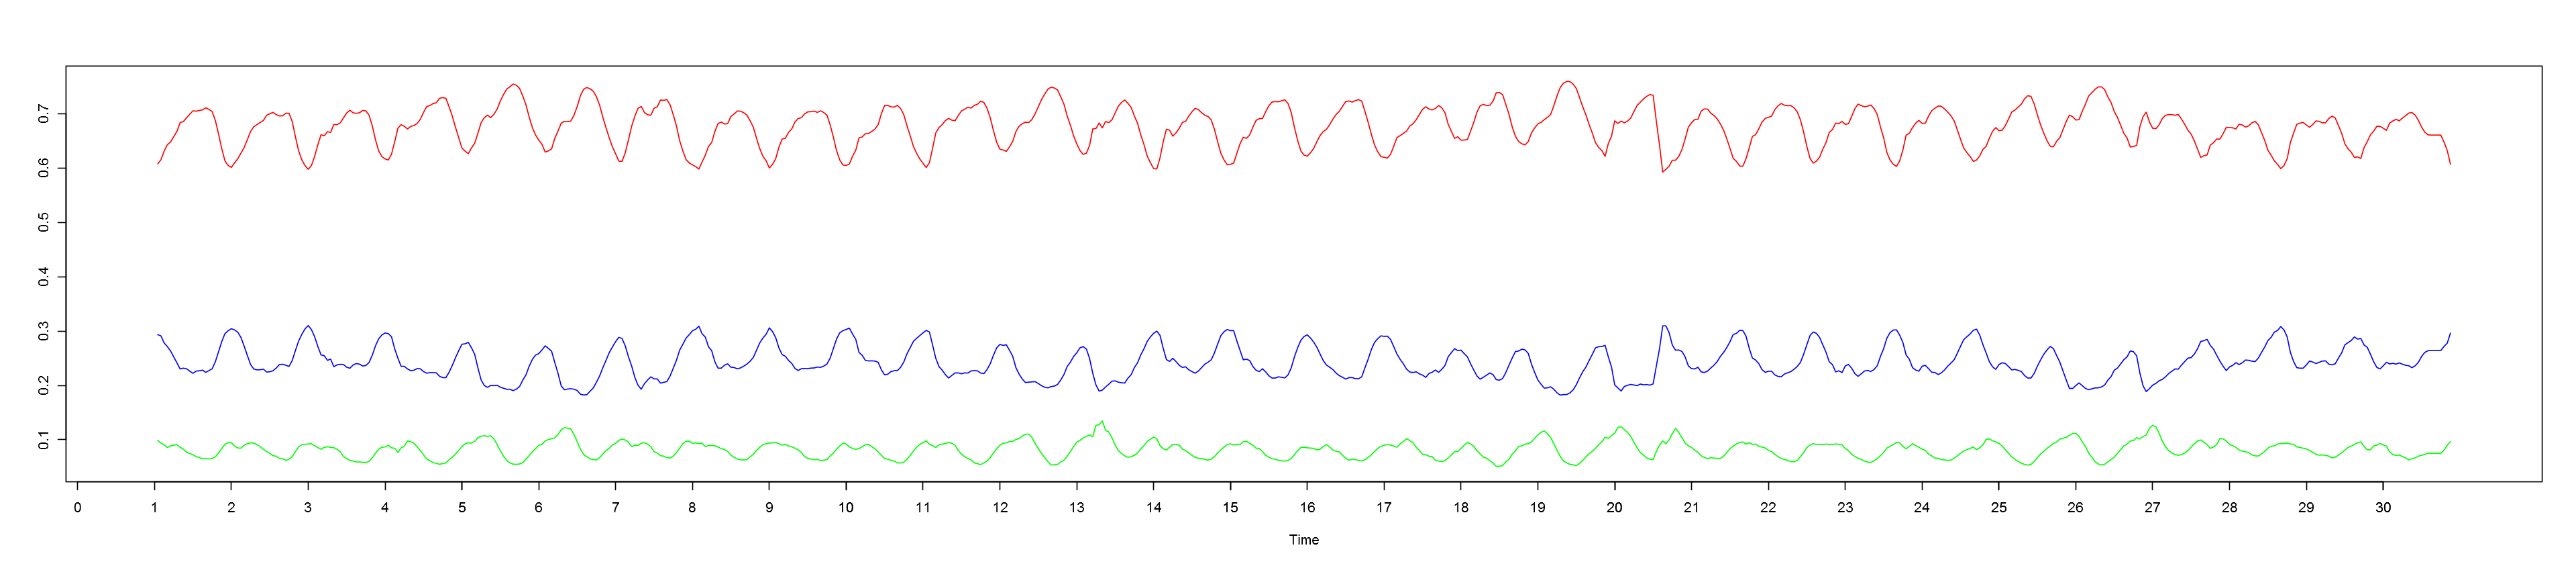

In [14]:

ts.plot(rollmean(cas/fp, 3), rollmean(look/fp,3), rollmean(ref/fp,3), col=c("red", "blue", "green"))
axis(side=1, at = c(1:30))


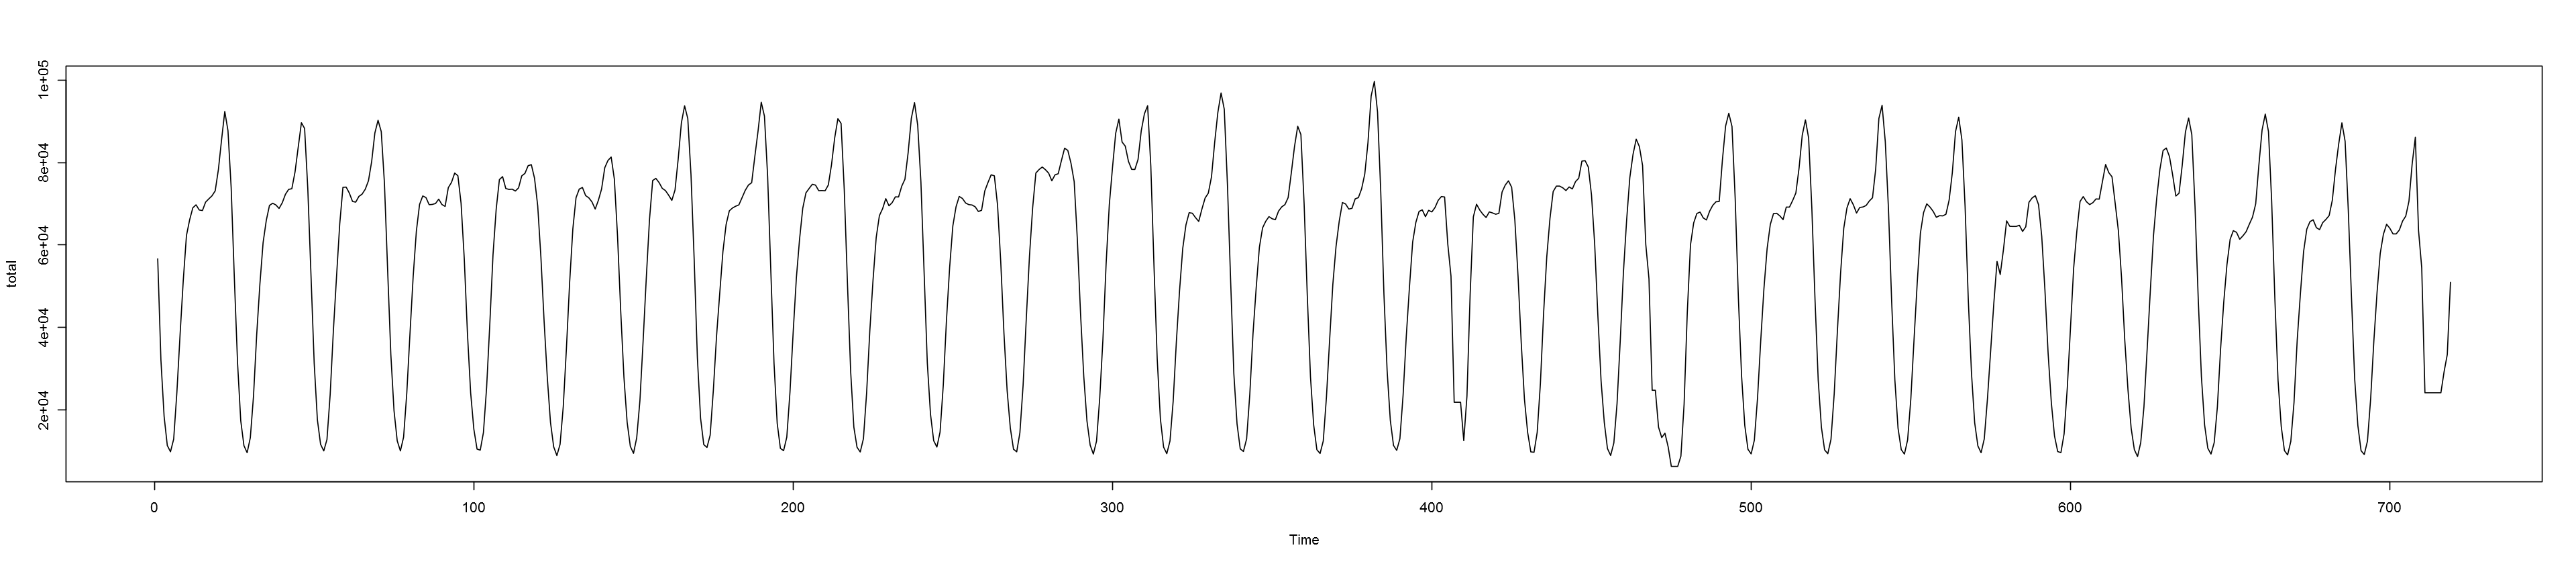

In [40]:
ts.plot(total)

In [ ]:
plot-stages(ccsv, lcsv, rcsv){
    cas = read.csv(ccsv)
    look = read.csv(lcsv)
    ref = read.csv(rcsv)
    
}